In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
ec_df = pd.read_csv('Ecommerce_Delivery_Analytics_New.csv')

In [10]:
class ecommerce:
    """
       Initialize class with dataframe
    """
    def __init__(self,ec_df):
        self.ec_df = ec_df
    """
       Displays dataset
    """
    def dataframe(self):
        return self.ec_df
    """
       Information of the dataset
    """
    def basic_info(self):
        return self.ec_df.info()

    """
       rows and columns count
    """
    def count_rows_columns(self):
        return self.ec_df.shape
    """
       Indexing
    """
    def Indexing(self):
        return self.ec_df.index
    """
       Checking null values
    """
    def null_values_sum(self):
        return self.ec_df.isnull().sum()
    """
       top 3 product category
    """
    def top_product_category (self):
        return self.ec_df['Product Category'].value_counts().head(3)
    """
       refunds_by_platform
    """
    def refunds_by_platform (self):
        return self.ec_df[self.ec_df['Refund Requested'] == 'Yes'].groupby('Platform').size().reset_index(name='Refund Count')
    """
       Delivery_Delay_by_platform
    """
    def Delivery_Delay_by_platform (self):
        return self.ec_df[self.ec_df['Delivery Delay'] == 'Yes'].groupby('Platform').size().reset_index(name='Delivery Delay')
    """
       avg delivary time of each platform
    """
    def avg_delivary_time(self):
        return self.ec_df.groupby('Platform')['Delivery Time (Minutes)'].mean() 
    """
       better average service rating by platform
    """
    def better_service_rating(self):
        return self.ec_df.groupby('Platform')['Service Rating'].mean().head(3)
    """
       calculating outliers
    """
    def Outliers(self, col):
        Q1 = self.ec_df[col].quantile(0.25)
        Q3 = self.ec_df[col].quantile(0.75)
        IQR = Q3 - Q1 # inter quartile range
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        outliers = self.ec_df[(self.ec_df[col] < lower_bound) | (self.ec_df[col] > upper_bound)]
        print(f"Lower Bound: {lower_bound}")
        print(f"Upper Bound: {upper_bound}")
        print(f"Number of outliers: {len(outliers)}")
        return
    """
       heat map
    """
    def heat_map(self):
        numeric_df = self.ec_df.select_dtypes(include=np.number)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.show()
    """
       outliners
    """
    def outlayers(self):
        return plt.boxplot(ec_df['Service Rating'])

    """
       outliners
    """
    def Outliers(self, col):
        Q1 = self.ec_df[col].quantile(0.25)
        Q3 = self.ec_df[col].quantile(0.75)
        IQR = Q3 - Q1 # inter quartile range
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        outliers = self.ec_df[(self.ec_df[col] < lower_bound) | (self.ec_df[col] > upper_bound)]
        print(f"Lower Bound: {lower_bound}")
        print(f"Upper Bound: {upper_bound}")
        print(f"Number of outliers: {len(outliers)}")
        return

        


        
    
    

In [12]:
Ecom = ecommerce(ec_df)

In [13]:
Ecom.dataframe()

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [14]:
Ecom.basic_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Order ID                 100000 non-null  object
 1   Customer ID              100000 non-null  object
 2   Platform                 100000 non-null  object
 3   Order Date & Time        100000 non-null  object
 4   Delivery Time (Minutes)  100000 non-null  int64 
 5   Product Category         100000 non-null  object
 6   Order Value (INR)        100000 non-null  int64 
 7   Customer Feedback        100000 non-null  object
 8   Service Rating           100000 non-null  int64 
 9   Delivery Delay           100000 non-null  object
 10  Refund Requested         100000 non-null  object
dtypes: int64(3), object(8)
memory usage: 8.4+ MB


In [105]:
Ecom.count_rows_columns()

(100000, 11)

In [106]:
Ecom.Indexing()

RangeIndex(start=0, stop=100000, step=1)

In [107]:
Ecom.null_values_sum()

Order ID                   0
Customer ID                0
Platform                   0
Order Date & Time          0
Delivery Time (Minutes)    0
Product Category           0
Order Value (INR)          0
Customer Feedback          0
Service Rating             0
Delivery Delay             0
Refund Requested           0
dtype: int64

In [108]:
Ecom.top_product_category()

Product Category
Dairy      16857
Grocery    16737
Snacks     16705
Name: count, dtype: int64

In [109]:
Ecom.refunds_by_platform()

,Platform,Refund Count
0,Blinkit,15353
1,JioMart,15178
2,Swiggy Instamart,15288


In [110]:
Ecom.Delivery_Delay_by_platform()

,Platform,Delivery Delay
0,Blinkit,4473
1,JioMart,4580
2,Swiggy Instamart,4619


In [111]:
Ecom.avg_delivary_time()

Platform
Blinkit             29.474898
JioMart             29.634498
Swiggy Instamart    29.499925
Name: Delivery Time (Minutes), dtype: float64

In [112]:
Ecom.better_service_rating()

Platform
Blinkit             3.233844
JioMart             3.245147
Swiggy Instamart    3.243415
Name: Service Rating, dtype: float64

In [113]:
Ecom.Outliers("Order Value (INR)")

Lower Bound: -447.5
Upper Bound: 1500.5
Number of outliers: 4360


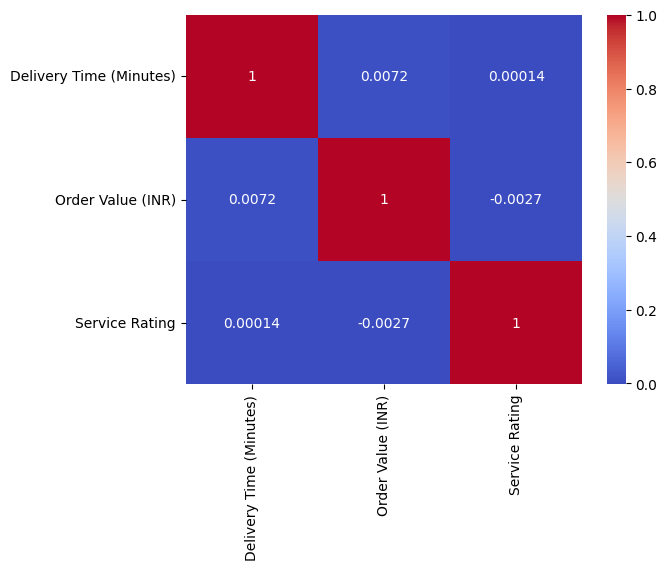

In [114]:
Ecom.heat_map()

{'whiskers': [<matplotlib.lines.Line2D at 0x131d27c50>,
 'caps': [<matplotlib.lines.Line2D at 0x131d27ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x131d27b10>],
 'medians': [<matplotlib.lines.Line2D at 0x131d68190>],
 'fliers': [<matplotlib.lines.Line2D at 0x131d682d0>],
 'means': []}

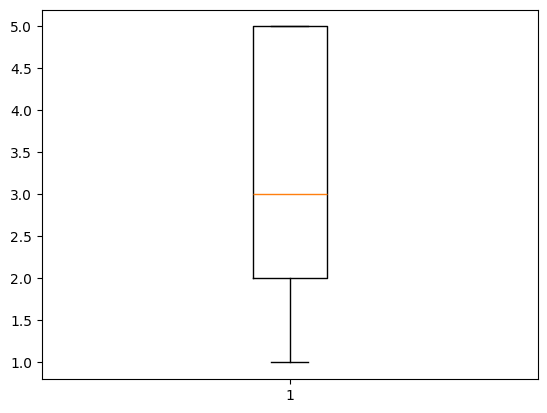

In [115]:
Ecom.outlayers()

In [15]:
Ecom.Outliers('Order Value (INR)')

Lower Bound: -447.5
Upper Bound: 1500.5
Number of outliers: 4360


In [ ]:
Ecom

In [7]:
import re
import psycopg2

# --- 1. Sanitize table name (important!) ---
table_name = 'Ecommerce_Delivery_Analytics_New'
clean_table_name = re.sub(r'\W+', '_', table_name)  # Replace special chars with underscores

# --- 2. Infer SQL types from pandas dtypes ---
def infer_sql_types(dtype):
    import pandas as pd
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'

columns = ec_df.dtypes
sql_columns = ',\n '.join([f'"{col}" {infer_sql_types(dtype)}' for col, dtype in columns.items()])

# --- 3. Generate CREATE TABLE statement ---
create_stmt = f"""
CREATE TABLE IF NOT EXISTS {clean_table_name} (
 {sql_columns}
);
"""

# --- 4. Connect to PostgreSQL ---
conn = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="@Venkat2252",
    host="localhost",
    port="5432"
)

cur = conn.cursor()

# --- 5. Create table ---
cur.execute(create_stmt)
conn.commit()

# --- 6. Prepare INSERT statement ---
columns_list = list(ec_df.columns)
placeholders = ', '.join(['%s'] * len(columns_list))
insert_stmt = f"""
INSERT INTO {clean_table_name} ({', '.join(['"{}"'.format(col) for col in columns_list])})
VALUES ({placeholders});
"""

# --- 7. Insert data efficiently (bulk insert) ---
data = [tuple(row) for row in ec_df.to_numpy()]
cur.executemany(insert_stmt, data)
conn.commit()

cur.close()
conn.close()

print(f"✅ Data inserted successfully into table: {clean_table_name}")

✅ Data inserted successfully into table: Ecommerce_Delivery_Analytics_New
